In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
df = pd.read_csv('HAM10000_metadata.csv')
clean_df = df.dropna(axis = 'rows')
clean_df = clean_df.loc[clean_df['sex'] != 'unknown']
clean_df = clean_df.loc[clean_df['localization'] != 'unknown']

clean_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
grouped = clean_df.groupby('localization').count()[['dx']].sort_values(by=['dx'], ascending=False)
grouped

,dx
localization,
back,2190
lower extremity,2077
trunk,1400
upper extremity,1116
abdomen,1019
face,743
chest,405
foot,314
neck,168


<AxesSubplot:xlabel='localization'>

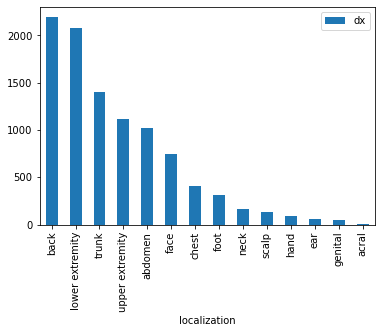

In [4]:
grouped.plot(kind='bar')



In [5]:
bins = [0, 39.9 ,49.9, 59.9, 69.9, 79.9, 80]
group_names = ['Under Forty', 'Forties', 'Fifties', 'Sixties', 'Seventies', 'Over 80']

clean_df2 = clean_df
clean_df2['Age Groups'] = pd.cut(clean_df2['age'], bins, labels=group_names, include_lowest=True)
print(clean_df2)

         lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

      Age Groups  
0        Over 80  
1        Over 80  
2     

In [6]:
grouped_age = clean_df2.groupby(['Age Groups']).count()[['dx']]
grouped_age

,dx
Age Groups,
Under Forty,1829
Forties,2198
Fifties,2173
Sixties,1516
Seventies,1360
Over 80,399


<AxesSubplot:xlabel='Age Groups'>

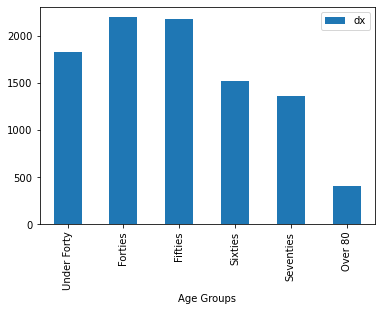

In [7]:
grouped_age.plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

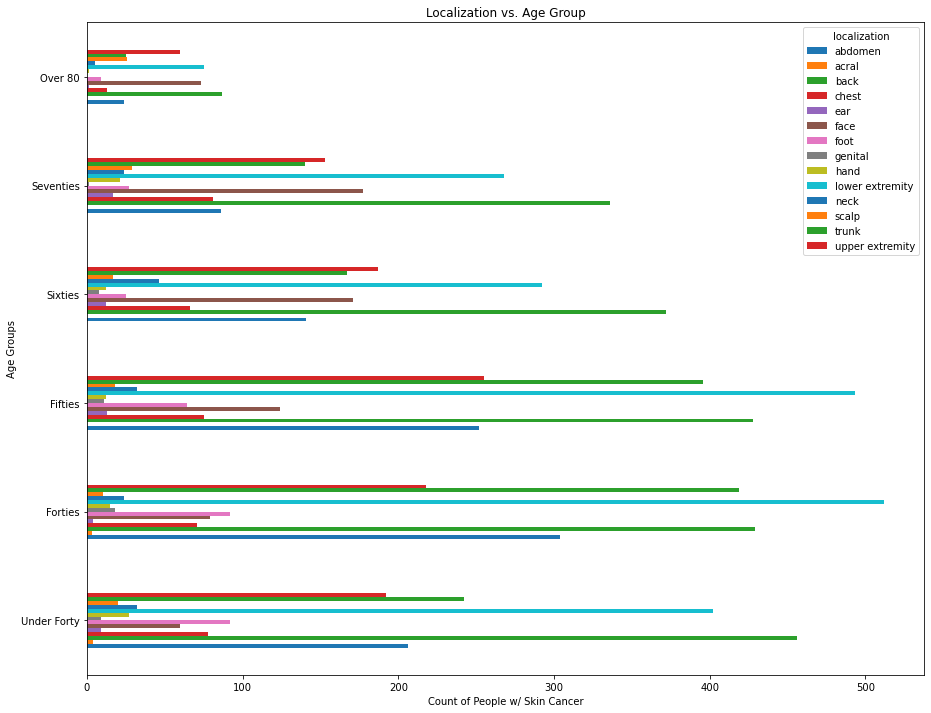

In [8]:
clean_df2.groupby('localization')["Age Groups"].value_counts().unstack(0).plot.barh(figsize=(15,12))

plt.title("Localization vs. Age Group")
plt.xlabel("Count of People w/ Skin Cancer")
plt.ylabel("Age Groups")

plt.rcParams.update({'font.size': 40})

# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.show